# Relatório de Análise VII

## Criando Argumentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('aluguel_residencial.csv',sep=';')

In [3]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0,17.14,Apartamento


In [4]:
dados['Valor'].mean()

5065.358143839238

In [5]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']

In [6]:
selecao = dados['Bairro'].isin(bairros)

In [7]:
dados = dados[selecao]

In [8]:
dados['Bairro'].drop_duplicates()

0          Copacabana
6     Barra da Tijuca
17             Tijuca
21            Ipanema
25           Botafogo
29             Leblon
80           Flamengo
Name: Bairro, dtype: object

In [9]:
grupo_bairro = dados.groupby('Bairro')

In [10]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [11]:
grupo_bairro['Valor'].mean()

Bairro
Barra da Tijuca    7284.894150
Botafogo           8738.794613
Copacabana         4131.014796
Flamengo           4142.011034
Ipanema            9358.824931
Leblon             8750.783425
Tijuca             2042.194070
Name: Valor, dtype: float64

In [12]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> {data.Valor.mean()}')

Barra da Tijuca -> 7284.894150417827
Botafogo -> 8738.794612794612
Copacabana -> 4131.01479610249
Flamengo -> 4142.011034482759
Ipanema -> 9358.824930747922
Leblon -> 8750.78342455043
Tijuca -> 2042.1940700808625


In [13]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7284.89,3517.62
Botafogo,8738.79,956.56
Copacabana,4131.01,1098.07
Flamengo,4142.01,1086.69
Ipanema,9358.82,2195.36
Leblon,8750.78,2075.75
Tijuca,2042.19,703.38


## Estatísticas Descritivas

In [15]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3949.0,7284.89,12749.74,100.0,2500.0,4500.0,8500.0,600000.0
Botafogo,891.0,8738.79,150660.95,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2771.0,4131.01,3590.63,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,725.0,4142.01,3859.74,800.0,1900.0,2900.0,5000.0,35000.0
Ipanema,1805.0,9358.82,8219.68,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1279.0,8750.78,6983.34,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1113.0,2042.19,1655.30,750.0,1500.0,1800.0,2300.0,45000.0


In [17]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo','max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,100.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Valor médio dos alugueis por bairro')

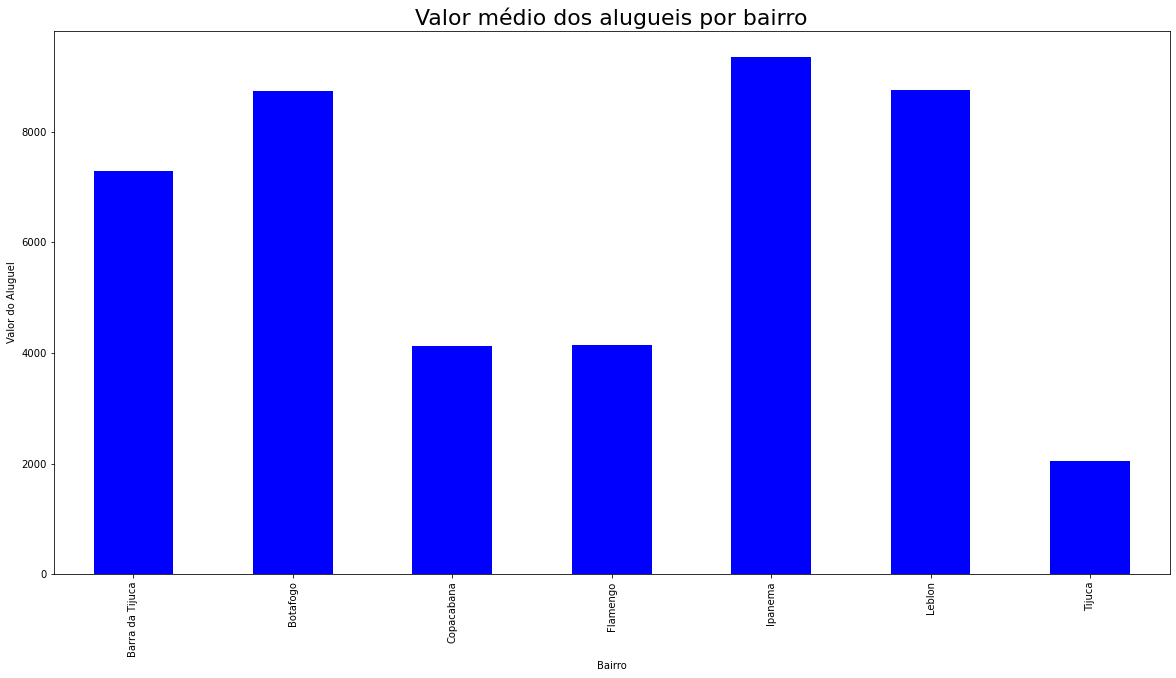

In [21]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor médio dos alugueis por bairro', {'fontsize': 22})